In this code, I'm going to play with my TNG data using k-nearest neighbors and random forest classification.

In [1]:
import h5py
import numpy as np
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

/Users/spencershortt/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#df=pd.read_csv('/Users/spencershortt/TNG2019/machine_learning_tng100.txt', sep="\t")
df=pd.read_csv('/Users/spencershortt/TNG2019/machine_learning_tng100_2.txt', sep="\t")
df.head()

,Unnamed: 0,id,gini,m20,concentration,flag,label,mass_stars,sfr,GasMass,...,gas_metallicity_in_halfrad,u_band,b_band,v_band,k_band,g_band,r_band,i_band,z_band,sSFR
0,0,0.0,0.614704,-2.752232,4.527077,0.0,1,251.0160,2.227190,3900.6000,...,0.007995,-24.1033,-24.5115,-25.3760,-28.3094,-24.9662,-25.7158,-26.0726,-26.3286,0.008873
1,1,1.0,0.574363,-2.220317,3.663501,0.0,1,37.8526,0.413285,444.5590,...,0.011339,-22.1142,-22.4991,-23.3480,-26.2491,-22.9476,-23.6833,-24.0339,-24.2839,0.010918
2,2,2.0,0.647357,-2.288265,4.597688,0.0,1,42.4824,17.392200,12.6116,...,0.012482,-23.0677,-23.1291,-23.7847,-26.5456,-23.4980,-24.0692,-24.3691,-24.5975,0.409398
3,3,3.0,0.513784,-2.029409,3.567780,0.0,2,11.6209,5.079380,16.9682,...,0.026441,-21.9708,-22.0503,-22.6820,-25.3858,-22.4122,-22.9552,-23.2390,-23.4537,0.437090
4,4,5.0,0.573778,-2.596948,4.938205,0.0,1,13.0163,0.886559,2.0604,...,0.016969,-21.0785,-21.4155,-22.2306,-25.1326,-21.8497,-22.5584,-22.9041,-23.1542,0.068111


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'gini', 'm20', 'concentration', 'flag', 'label',
       'mass_stars', 'sfr', 'GasMass', 'gas_metallicity', 'star_metallicity',
       'sfr_in_halfrad', 'mass_in_halfrad_stars', 'mass_in_halfrad_gas',
       'star_metallicity_in_halfrad', 'gas_metallicity_in_halfrad', 'u_band',
       'b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band',
       'sSFR'],
      dtype='object')

In [4]:
#X=df[['k_band','sfr','mass_stars','gas_metallicity','star_metallicity']]
#X=df[['k_band','mass_stars','sSFR']]#,'mass_stars','gas_metallicity','star_metallicity']]
#X=df.drop(["id",'flag','label','gini','m20','concentration'],axis=1)
#X=df[['sfr_in_halfrad', 'mass_in_halfrad_stars', 'mass_in_halfrad_gas',
#       'star_metallicity_in_halfrad', 'gas_metallicity_in_halfrad']]
#X=df[['gini', 'm20', 'concentration']]
X=df[['u_band','b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band',
     'sfr','mass_stars','gas_metallicity','star_metallicity','sSFR']]
y=df['label']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=4)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6601, 13)
(6601,)
(1651, 13)
(1651,)


In [7]:
k_range=range(1,26)
train_scores={}
train_scores_list=[]
test_scores={}
test_scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #test_scores[k]=metrics.accuracy_score(y_test, y_pred)
    #test_scores_list.append(metrics.accuracy_score(y_test, y_pred))
    test_scores[k]=knn.score(X_test, y_test)
    test_scores_list.append(knn.score(X_test, y_test))
    train_scores[k]=knn.score(X_train, y_train)
    train_scores_list.append(knn.score(X_train, y_train))


0.680193821926


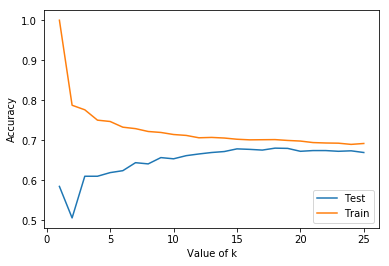

In [8]:
plt.plot(k_range, test_scores_list, label='Test')
plt.plot(k_range, train_scores_list, label='Train')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
print(max(test_scores_list))

In [9]:
forest = RandomForestClassifier(n_estimators=18, random_state=20)#n_estimators=5 original
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=18, n_jobs=1, oob_score=False, random_state=20,
            verbose=0, warm_start=False)

In [10]:
forest.score(X_train, y_train)


0.99636418724435694

In [11]:
forest.score(X_test, y_test)

0.68261659600242275

In [12]:
forest.feature_importances_

array([ 0.07796825,  0.05722666,  0.05216564,  0.09132653,  0.05913392,
        0.05711727,  0.05918878,  0.07066541,  0.07177678,  0.12055796,
        0.0841648 ,  0.10080455,  0.09790345])

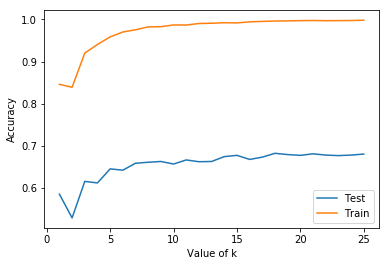

In [13]:
test_scores_list=[]
train_scores_list=[]
for n in k_range:
    forest = RandomForestClassifier(n_estimators=n, random_state=20)#n_estimators=5 original
    forest.fit(X_train, y_train)
    
    train_scores_list.append(forest.score(X_train, y_train))
    test_scores_list.append(forest.score(X_test, y_test))
    

plt.plot(k_range, test_scores_list, label='Test')
plt.plot(k_range, train_scores_list, label='Train')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")